In [35]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import seaborn as sns


In [36]:
df_batch2 = pd.read_csv('data/batch2_param_evol.csv')

In [37]:

# Assuming 'meas_time' is in string format, convert it to datetime
df_batch2['meas_time'] = pd.to_datetime(df_batch2['meas_time'])

# Calculate the time difference in hours
df_batch2['Time (hr)'] = (df_batch2['meas_time'] - df_batch2['meas_time'][0]).dt.total_seconds() / 3600

In [38]:
new_color = cm.get_cmap('turbo', 7)

def make_plot_hr(df, param, min_val, max_val,title):
    fig, ax = plt.subplots(figsize=(5, 3))

    cells = df['CellNo'].unique()

    for cell in cells:
        color = new_color(cell // 4)  # Get a color from the viridis colormap
        ax.plot(
            df[df['CellNo'] == cell]['Time (hr)'],
            df[df['CellNo'] == cell][param],
            label=str(cell),
            color=color,
            alpha = 0.7
        )
        ax.scatter(
            df[df['CellNo'] == cell]['Time (hr)'],
            df[df['CellNo'] == cell][param],
            s=5,
            color=color,
            alpha = 0.5
        )

    ax.set_ylim([min_val, max_val])
    ax.set_xlabel('Time (Hours)')
    ax.set_ylabel(title)
    #ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    #ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 7}, ncol=3)


    # Create a ScalarMappable to map the color values to scalar values
    norm = Normalize(vmin=0, vmax=7)
    sm = plt.cm.ScalarMappable(cmap=new_color, norm=norm)
    sm.set_array([])
    # Add the colorbar
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label('Composition')  # Set the title for the colorbar

    # Set the ticks and labels for the colorbar
    cbar.set_ticks([1,2,3,4,5,6,7])#np.linspace(1, 21, num=7))

    plt.show()

/var/folders/kk/89mlzxln5h5flt61ccln8rgc0000gn/T/ipykernel_374/1947081851.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  new_color = cm.get_cmap('turbo', 7)


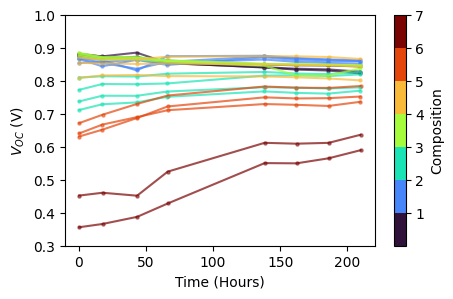

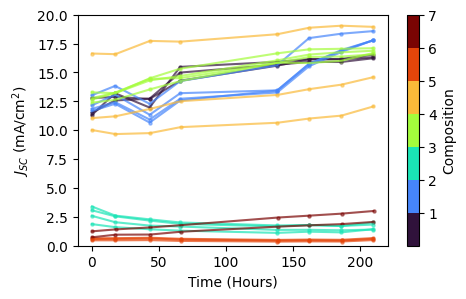

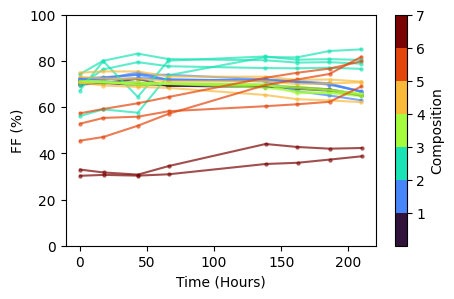

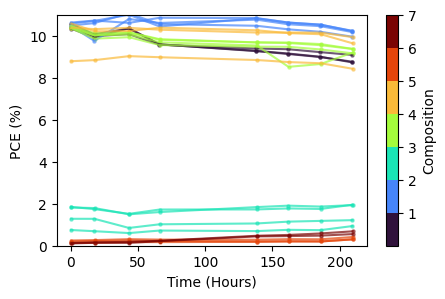

In [39]:
make_plot_hr(df_batch2,'Voc (V)',0.3,1,'$V_{OC}$ (V)')
make_plot_hr(df_batch2,'Jsc(mA/cm2)',0,20,'$J_{SC}$ (mA/cm$^2$)')
make_plot_hr(df_batch2,'FF_est (%)',0,100,'FF (%)')
make_plot_hr(df_batch2,'PCE (%)',0,11, 'PCE (%)')
